# Phase transition in connection length

In [1]:
import numpy as np
import matplotlib.pyplot as plt

BoxLength = 60
R = 20
filename = "SV_R" + str(R) + "_BS" + str(BoxLength) + "_c.cat"

catalog = np.loadtxt(filename)

X = catalog[:,0]
Y = catalog[:,1]
Z = catalog[:,2]

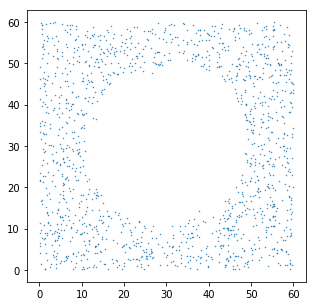

In [2]:
index = np.where( abs(catalog[:,2] - BoxLength / 2) < R / 2 )


fig = plt.figure(figsize=[5,5])
plt.scatter(catalog[index,0], catalog[index,1], s=0.2)

In [ ]:
"""
Beta_list = [ "0.3",  "0.4",  "0.5",  "0.6",  "0.7",  "0.8",  "0.9",  "0.92", "0.94", "0.96", "0.98", 
            "0.99", "1.0" ,  "1.1",  "1.2",  "1.3",
        "1.4",  "1.5",  "1.6",  "1.7",  "1.8",  "1.9",  "2.0" ,  "2.1",  "2.2",  "2.3",  "2.4",
        "2.5",  "2.6",  "2.7",  "2.8",  "2.9",  "3.0" ,  "3.2",  "3.4",  "3.6",  "3.8",  "4.0" ,
        "4.5",  "5.0" ,  "5.5",  "6.0" ,  "7.0" ,  "8.0" ,  "9.0" , "10.0"]
"""
Beta_list = [ "0.99", "1.0"]

In [ ]:
for m in range(len(Beta_list)):
    beta_x = np.loadtxt("SV_R20_BS60_B_" + Beta_list[m] + ".bsk")

    fig = plt.figure(figsize=(6,6))
    for k in beta_x:
        i = int(k[0])
        j = int(k[1])
        if ( (abs(Z[i] - BoxLength / 2) < R / 4) or (abs(Z[j] - BoxLength / 2) < R / 4) ) :
            plt.plot( (X[i],X[j]), (Y[i],Y[j]) )
        # print(k)
    plt.xlim(0,BoxLength)
    plt.ylim(0,BoxLength)

    plt.title("Spherical Void (R = 20Mpc/h)\n" + r"$\beta =$ " + Beta_list[m])

    plt.xlabel("X (Mpc/h)")
    plt.ylabel("Y (Mpc/h)")


    plt.savefig( "beta_" + Beta_list[m] + ".png" )
    
    #plt.close()

In [3]:
a_label = "0.99"
b_label = "1.00"

a = np.loadtxt("SV_R20_BS60_B_" + a_label +".bsk")
b = np.loadtxt("SV_R20_BS60_B_" + b_label +".bsk")

a = a.astype(int)
b = b.astype(int)

# Number of connections per point

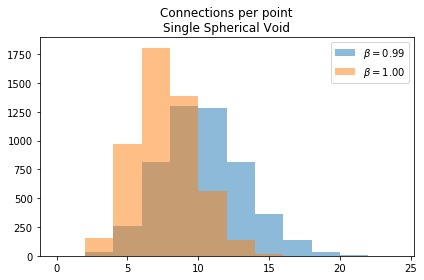

In [16]:
a_connections = []
b_connections = []

for i in range( catalog.shape[0] ):
    a_connections.append(np.where(a[:,0]==i)[0].shape[0])
    b_connections.append(np.where(b[:,0]==i)[0].shape[0])

bins = np.linspace(0,24,13)

plt.hist( a_connections, bins, alpha=0.5, label=r"$\beta=" + a_label + "$")
plt.hist( b_connections, bins, alpha=0.5, label=r"$\beta=" + b_label + "$")
plt.legend()
#plt.yscale("log")
plt.title("Connections per point\nSingle Spherical Void")

plt.tight_layout()

plt.savefig("connections_per_point_"+ str(a_label)+"_and_" +  str(b_label) + "skeleton.pdf", format="pdf")

 # Connection Length

In [6]:
def distance(p1,p2):
    r = 0
    for i in range(3):
        r += (p1[i]-p2[i])**2
    return ( r )**0.5

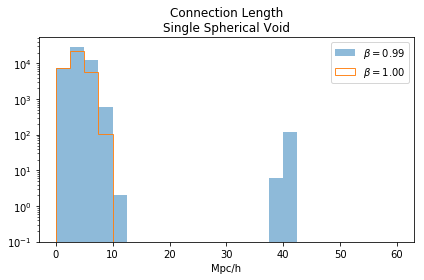

In [8]:
a_dist = []
b_dist = []

for k in a:
    a_dist.append( distance( catalog[k[0]], catalog[k[1]]) )
    
for k in b:
    b_dist.append( distance( catalog[k[0]], catalog[k[1]]) )    
    
a_dist = np.array(a_dist)
b_dist = np.array(b_dist)

bins = np.linspace(0,60,25)

plt.hist( a_dist, bins, log=True, alpha=0.5, label=r"$\beta=" + a_label + "$")
plt.hist( b_dist, bins, log=True, alpha=0.9, label=r"$\beta=" + b_label + "$", histtype="step")
plt.xlabel("Mpc/h")
plt.legend()
plt.title("Connection Length\nSingle Spherical Void")


plt.tight_layout()

plt.savefig("connection_length_"+ str(a_label)+"_and_" +  b_label + "skeleton.pdf", format="pdf")

# Where Connection Length (@ $\beta = 0.99$) is above Mean Length (@ $\beta = 1.0$)

In [10]:
index = np.where( (a_dist[:] > 30) )

In [11]:
sphere = catalog[a[index[0],0]]

In [12]:
sphere.shape

(128, 3)

sphere.shape: (128, 3)


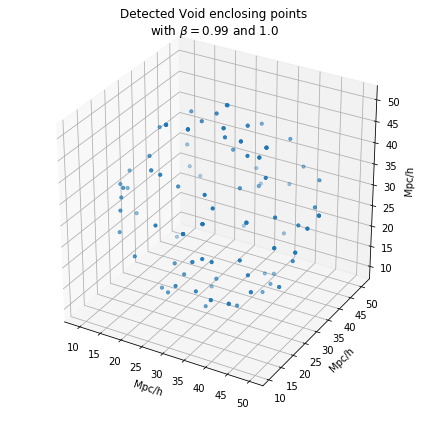

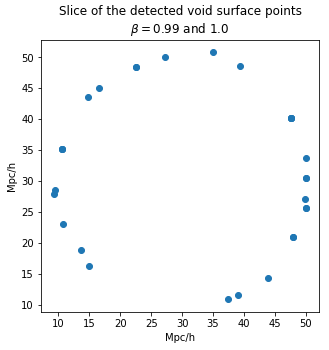

In [14]:
from mpl_toolkits.mplot3d import Axes3D

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=10)
ax.set_xlabel("Mpc/h")
ax.set_ylabel("Mpc/h")
ax.set_zlabel("Mpc/h")
plt.title("Detected Void enclosing points\n" + r"with $\beta = " + str(a_label) + "$ and 1.0")
plt.tight_layout()
plt.savefig("3d_scatter_detected_void_" + str(a_label) + ".pdf", format="pdf" )

print("sphere.shape:", sphere.shape)


index = np.where( abs(sphere[:,2] - BoxLength / 2) < R / 5 )


fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.set_aspect("equal")
plt.scatter(sphere[index,0], sphere[index,1])
plt.xlabel("Mpc/h")
plt.ylabel("Mpc/h")
plt.title("Slice of the detected void surface points\n" + r"$\beta = $"+ str(a_label) + " and 1.0")

plt.savefig("slice_scatter_detected_void_" + str(a_label) + ".pdf", format="pdf" )

In [57]:
sphere.shape

(128, 3)